In [13]:
import matplotlib.pyplot as plt

def draw_anchors(anchors, title):
    fig, ax = plt.subplots()
    for anchor in anchors:
        rect = plt.Rectangle((0, 0), anchor[0], anchor[1], edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(anchor[0] / 2, anchor[1] / 2, f"{anchor[0]:.1f}x{anchor[1]:.1f}", color='b', fontsize=12, ha='center', va='center')
    
    ax.set_xlim(0, max(a[0] for a in anchors) * 1.5)
    ax.set_ylim(0, max(a[1] for a in anchors) * 1.5)
    ax.set_aspect('equal')
    plt.title(title)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.grid(True)
    plt.show()

Anchor for P3/8: [16. 30.]
Anchor for P4/16: [62. 45.]
Anchor for P5/32: [156. 198.]


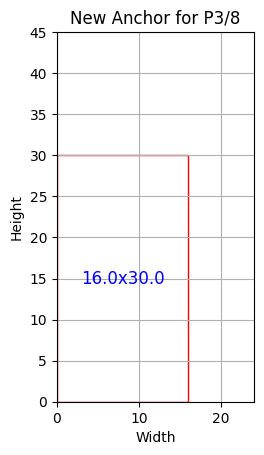

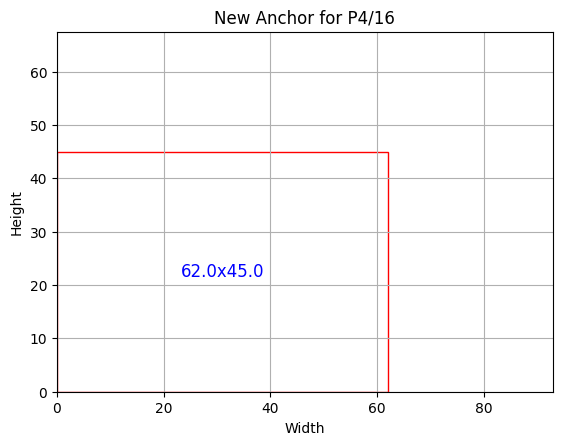

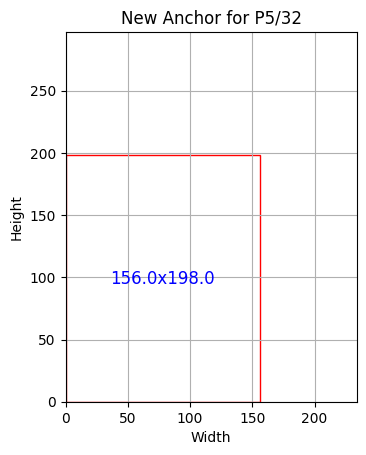

In [16]:
import numpy as np
from sklearn.cluster import KMeans

anchor = np.array([
    [16, 30], [62, 45], [156, 198] 
])

num_anchors = 3

kmeans = KMeans(n_clusters=num_anchors)
kmeans.fit(anchor)
anchors = kmeans.cluster_centers_
anchors = anchors[np.argsort(anchors[:, 0] * anchors[:, 1])]
anchors = anchors.reshape((3, 1, 2))

for i, scale in enumerate(["P3/8", "P4/16", "P5/32"]):
    print(f"Anchor for {scale}: {anchors[i][0]}")

for i, scale in enumerate(["P3/8", "P4/16", "P5/32"]):
    draw_anchors(anchors[i], f"New Anchor for {scale}")